# Data anlysis essential - 2 , performed by ARYAN

# Numpy basics

In [135]:
import numpy as np
import pandas as pd

In [137]:
# initially , before numpy , for computation we go longer way 
kanto_temp = 73
kanto_rainfall = 67
kanto_humidity = 43
w1,w2,w3 = 0.3,0.2,0.5
kanto_yield_apple = kanto_temp*w1 + kanto_rainfall*w2 + kanto_humidity*w3
kanto_yield_apple

56.8

In [139]:
# older method is long and tedious as if their are 30 entries , then it would br difficult
# now , let's see another approach using loop
#preparing data
kanto = [73,67,43]
johto = [91,88,64]
hoenn = [87,134,58]
sinnoh = [102,43,37]
unova = [69,96,70]
weights = [w1,w2,w3]

In [141]:
# making a function to do the work , zip function is used
zippy = zip(kanto , weights)
print('\n')
def crop_yield(region , weights):
    result = 0
    for r , w in zip(region , weights):
        result = result + r*w
    return result

In [143]:
crop_yield(kanto , weights)

56.8

In [145]:
for i in zippy: 
    print(i)
# zip function in action

(73, 0.3)
(67, 0.2)
(43, 0.5)


In [147]:
# now let's try new alternative which will certainlly improve speed and reduce tedious nature
kanto = np.array([73,67,43])
weights = np.array([w1,w2,w3])  # weig = np.array(weights) also prints same stuff
print(kanto)
print(weights)
print(type(kanto))
print(type(weights))

[73 67 43]
[0.3 0.2 0.5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [149]:
# operating on numpy
np.dot(kanto,weights) # It's simple :)

56.8

In [151]:
# other way
(kanto*weights).sum()

56.8

In [153]:
arr1 = np.array([1,2,3])
arr2 = np.array([4,5,6])
arr1*arr2 # each element will multiply with other element

array([ 4, 10, 18])

In [155]:
# for suming , use .sum()
arr1.sum()
# Benefit of using numpy : Ease of use , Performance

6

In [157]:
# use of time : it shows time of compilation
# python list
arr1 = list(range(10000))
arr2 = list(range(10000, 20000))
# numpy array
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [159]:
import time

In [161]:
# list method
start_time = time.time()
result = 0
for a1,a2 in zip(arr1,arr2):
    result = result + a1*a2
print(result)
end_time = time.time()
print(end_time - start_time)

833233335000
0.0020821094512939453


In [163]:
# numpy method
start_time = time.time()
logical = (np.dot(arr1_np,arr2_np))
print(logical)
end_time = time.time()
print(end_time - start_time)
# Warning : please see this in future

9679576
0.0


# Multi Dimensional array

In [165]:
# multi dimensional numpy array
climate_data = np.array([[73, 67, 43],
 [91, 88, 64],
 [87, 134, 58],
 [102, 43, 37],
 [69, 96, 70]])
climate_data

array([[ 73,  67,  43],
       [ 91,  88,  64],
       [ 87, 134,  58],
       [102,  43,  37],
       [ 69,  96,  70]])

In [167]:
# seeing shape 
print(climate_data.shape)
print(weights.shape)

(5, 3)
(3,)


In [169]:
arr3 = np.array([
 [[11, 12, 13], 
 [13, 14, 15]], 
 [[15, 16, 17], 
 [17, 18, 19.5]]])
print(arr3.shape)

(2, 2, 3)


In [171]:
# dtype : data type
weights.dtype

dtype('float64')

In [173]:
# matrix multiplication
# 1st way
np.matmul(climate_data,weights)

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [175]:
# 2nd way
np.dot(climate_data,weights)

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [177]:
# 3rd way
climate_data @ weights

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [192]:
# importing data
df = pd.read_csv(r"https://gist.github.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv")

In [193]:
df

,temperature,rainfall,humidity
0,25.0,76.0,99.0
1,39.0,65.0,70.0
2,59.0,45.0,77.0
3,84.0,63.0,38.0
4,66.0,50.0,52.0
...,...,...,...
9995,80.0,72.0,98.0
9996,27.0,58.0,60.0
9997,99.0,62.0,58.0
9998,70.0,71.0,91.0


In [198]:
# transforming into an array
climate_data = np.array(df)
climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [202]:
climate_data.shape

(10000, 3)

In [228]:
weights = np.array([0.3,0.2,0.5])
yields = climate_data @ weights
print(yields)
print(yields.shape)

[72.2 59.7 65.2 ... 71.1 80.7 73.4]
(10000,)


In [242]:
# concatenating  and reshaping
climate_results = np.concatenate((climate_data , yields.reshape(10000,1)),axis=1)
climate_results

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]])

In [244]:
# for saving as text
np.savetxt('climate_results.txt',
          climate_results,
          fmt='%.2f',
          delimiter=',',
          header='temperature,rainfall,humidity,yeild_apples', 
          comments ='')

# Arithmetic operations , broadcasting and comparison

In [322]:
# Arithmetic operations
arr2 = np.array([[1, 2, 3, 4], 
 [5, 6, 7, 8], 
 [9, 1, 2, 3]])
arr3 = np.array([[11, 12, 13, 14], 
 [15, 16, 17, 18], 
 [19, 11, 12, 13]])

In [248]:
# Adding a scalar
arr2 + 3

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12,  4,  5,  6]])

In [250]:
# Element wise substraction
arr3 - arr2

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]])

In [252]:
# Division by scalar
arr2/2

array([[0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. ],
       [4.5, 0.5, 1. , 1.5]])

In [254]:
# Element-wise multiplication
arr2 * arr3

array([[ 11,  24,  39,  56],
       [ 75,  96, 119, 144],
       [171,  11,  24,  39]])

In [256]:
# Modulus with scalar
arr2%4

array([[1, 2, 3, 0],
       [1, 2, 3, 0],
       [1, 1, 2, 3]], dtype=int32)

In [260]:
# Array Broadcasting : array increses itself to perform operation
arr2 = np.array([[1, 2, 3, 4], 
 [5, 6, 7, 8], 
 [9, 1, 2, 3]])
print(arr2.shape)

(3, 4)


In [262]:
arr4 = np.array([4, 5, 6, 7])
arr4.shape

(4,)

In [266]:
arr2 + arr4 # arr4 broadcasted himself

array([[ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13,  6,  8, 10]])

In [274]:
# array comparison
arr1 = np.array([[1, 2, 3], [3, 4, 5]])
arr2 = np.array([[2, 2, 3], [1, 2, 5]])
print(arr1 == arr2)
print(arr1 != arr2)
print(arr1 >= arr2)
print(arr1 < arr2)
print((arr1 == arr2).sum())

[[False  True  True]
 [False False  True]]
[[ True False False]
 [ True  True False]]
[[False  True  True]
 [ True  True  True]]
[[ True False False]
 [False False False]]
3


# Array indexing , slicing and different ways to make numpy arrays

In [280]:
# array indexing and slicing
arr3 = np.array([
 [[11, 12, 13, 14], 
 [13, 14, 15, 19]], 
 
 [[15, 16, 17, 21], 
 [63, 92, 36, 18]], 
 
 [[98, 32, 81, 23], 
 [17, 18, 19.5, 43]]])
print(arr3.shape)

(3, 2, 4)


In [284]:
# for single element
arr3[1,1,2]

36.0

In [286]:
# Subarray using ranges
arr3[1: , 0:1 , :2]

array([[[15., 16.]],

       [[98., 32.]]])

In [288]:
# mixing indices and ranges
arr3[1:,1,3]

array([18., 43.])

In [290]:
# Using less indices
arr3[1]

array([[15., 16., 17., 21.],
       [63., 92., 36., 18.]])

In [292]:
arr3[:2,1]

array([[13., 14., 15., 19.],
       [63., 92., 36., 18.]])

In [294]:
# we cannot use too many indices

In [ ]:
# Other ways of creating numpy arrays

In [296]:
# All zeroes
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [300]:
# All ones
np.ones([2,2,3])

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [304]:
# Identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [306]:
# Random vector
np.random.rand(5)

array([0.55578527, 0.25292812, 0.56062471, 0.27369946, 0.45908488])

In [308]:
# Random Matrix
np.random.randn(2,3)

array([[-0.23602047, -0.42866138, -2.01360179],
       [-0.05580243,  0.4312376 , -0.1539253 ]])

In [310]:
# Fixed value
np.full([2,3] , 42)

array([[42, 42, 42],
       [42, 42, 42]])

In [312]:
#  Range with start , end and step
np.arange(10,90,3)

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58,
       61, 64, 67, 70, 73, 76, 79, 82, 85, 88])

In [316]:
# Equally spaced numbers in a range
np.linspace(3,27,8)

array([ 3.        ,  6.42857143,  9.85714286, 13.28571429, 16.71428571,
       20.14285714, 23.57142857, 27.        ])

# Data Visualization using Python, Matplotlib and Seaborn

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

In [335]:
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]

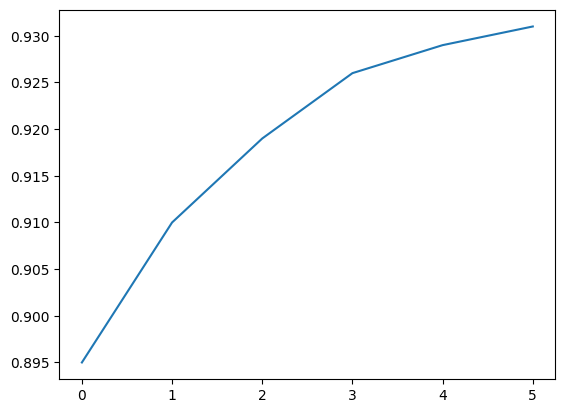

In [341]:
# basic plotting
plt.plot(yield_apples);

# custmizing 

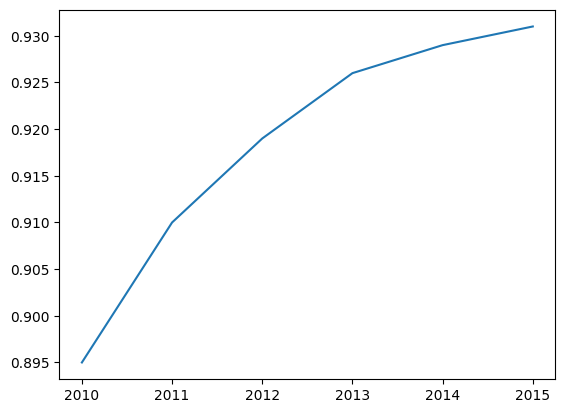

In [348]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]
plt.plot(years , yield_apples);

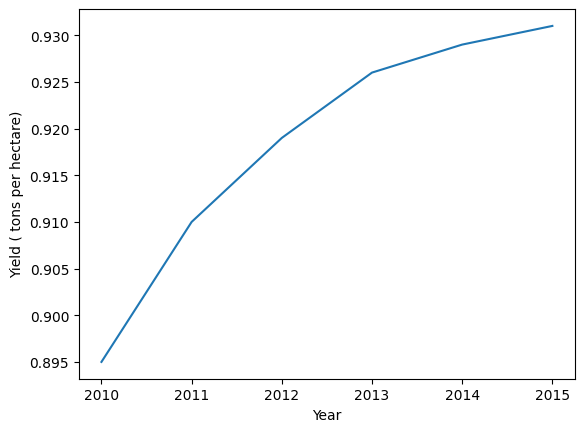

In [351]:
plt.plot(years,yield_apples)
plt.xlabel('Year')
plt.ylabel('Yield ( tons per hectare)');

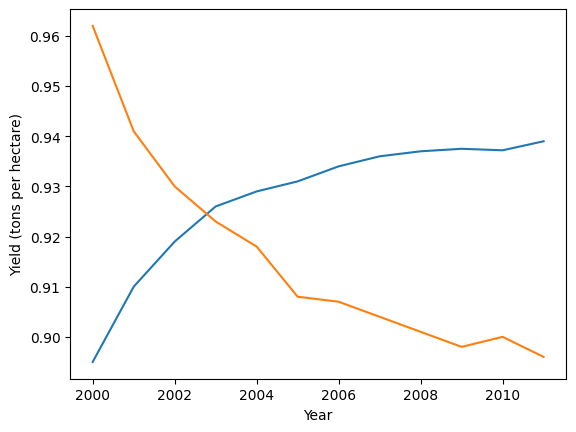

In [359]:
# Plotting multiple lines
years = range(2000, 2012)
apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.934, 0.936, 0.937, 0.9375, 0.9372, 0.939]
oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908, 0.907, 0.904, 0.901, 0.898, 0.9, 0.896, ]
plt.plot(years, apples)
plt.plot(years , oranges)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)');


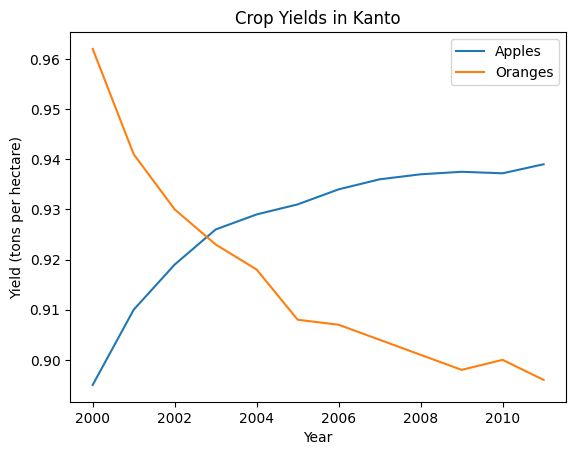

In [361]:
# Chart Title and Legend
plt.plot(years, apples)
plt.plot(years, oranges)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

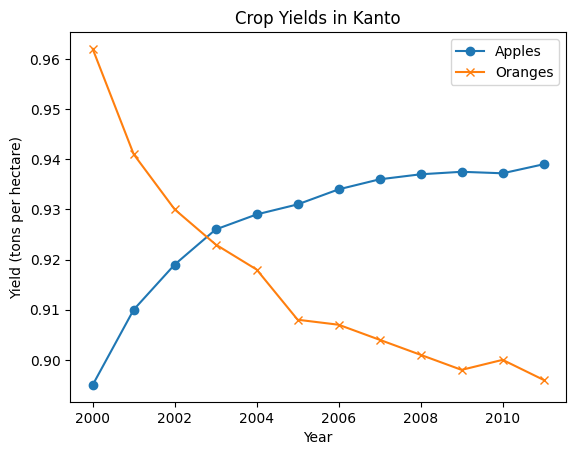

In [363]:
# Line Markers
plt.plot(years, apples, marker='o')
plt.plot(years, oranges, marker='x')
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);


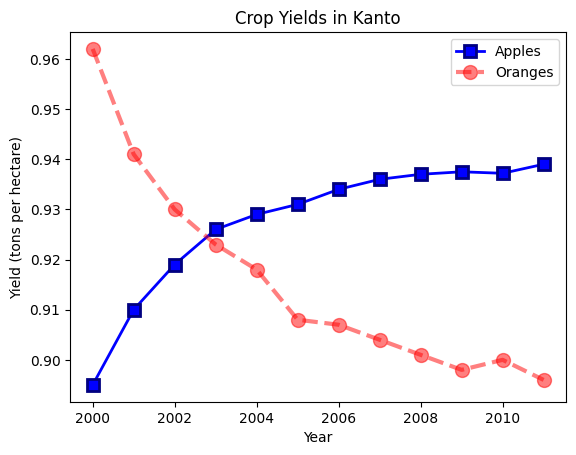

In [365]:
# Styling Lines and Markers
# Do'nt focus very much on this
plt.plot(years, apples, marker='s', c='b', ls='-', lw=2, ms=8, mew=2, mec='navy')
plt.plot(years, oranges, marker='o', c='r', ls='--', lw=3, ms=10, alpha=.5)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);


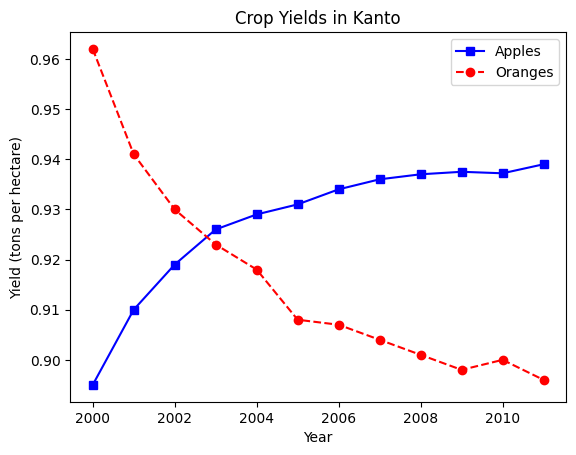

In [367]:
# fmt ='[marker][line][color]'
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'o--r')
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

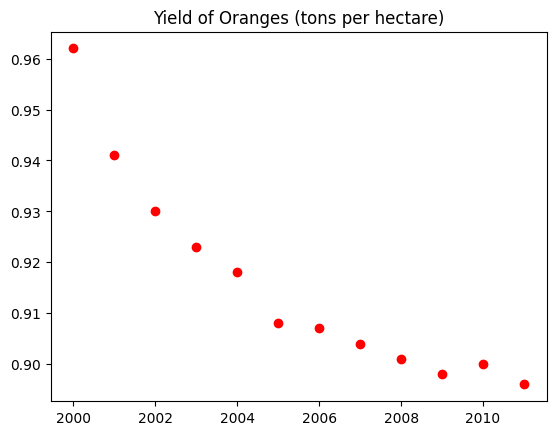

In [369]:
# If we don't describe line style in fmt , then markers will be onlly visible
plt.plot(years, oranges, 'or')
plt.title("Yield of Oranges (tons per hectare)");

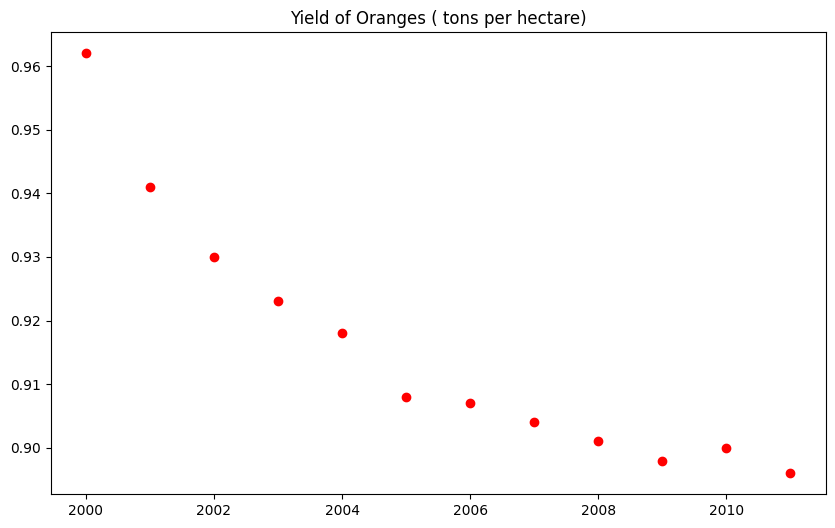

In [375]:
# Changing the figure size
plt.figure(figsize = (10,6))
plt.plot(years,oranges,'or')
plt.title("Yield of Oranges ( tons per hectare)");

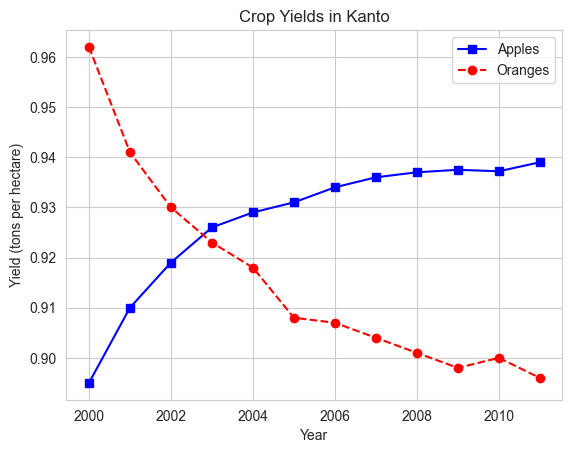

In [381]:
# Improving Default Styles using Seaborn
sns.set_style('whitegrid')
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'o--r')
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

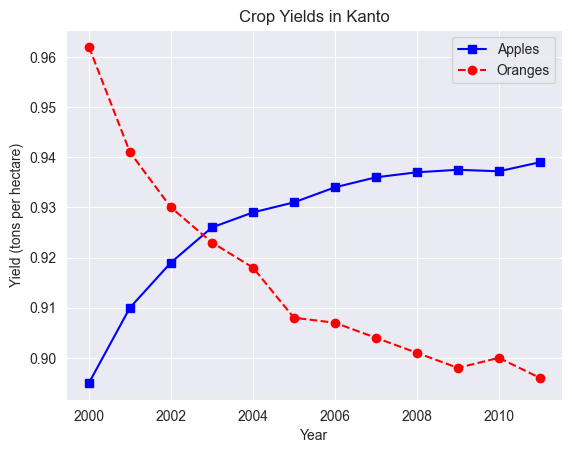

In [383]:
sns.set_style("darkgrid")
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'o--r')
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title("Crop Yields in Kanto")
plt.legend(['Apples', 'Oranges']);

# Scatter Plot

In [390]:
# loading data into a dataframe
flowers_df = sns.load_dataset('iris')

In [394]:
flowers_df.species.unique() # for finding out unique values

array(['setosa', 'versicolor', 'virginica'], dtype=object)

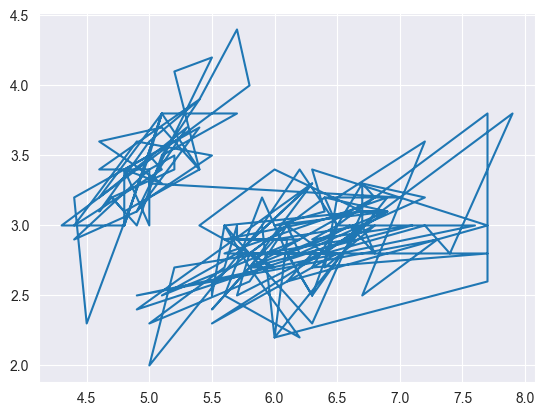

In [396]:
plt.plot(flowers_df.sepal_length , flowers_df.sepal_width); # not an informative graph

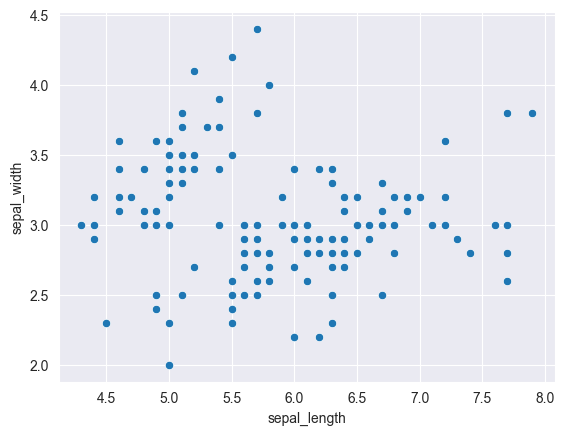

In [398]:
sns.scatterplot(x=flowers_df.sepal_length, y=flowers_df.sepal_width);

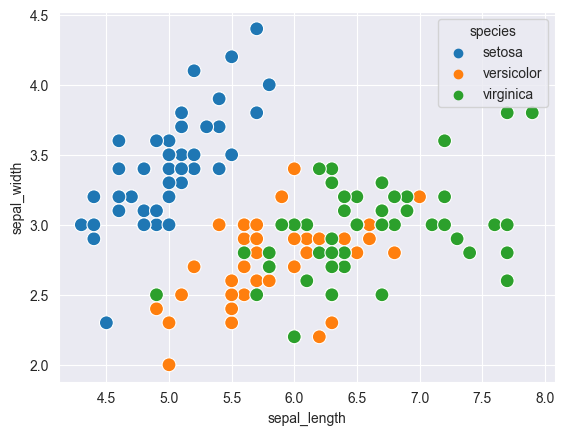

In [408]:
# Adding hues
sns.scatterplot(x=flowers_df.sepal_length, y=flowers_df.sepal_width, hue=flowers_df.species, s=100);


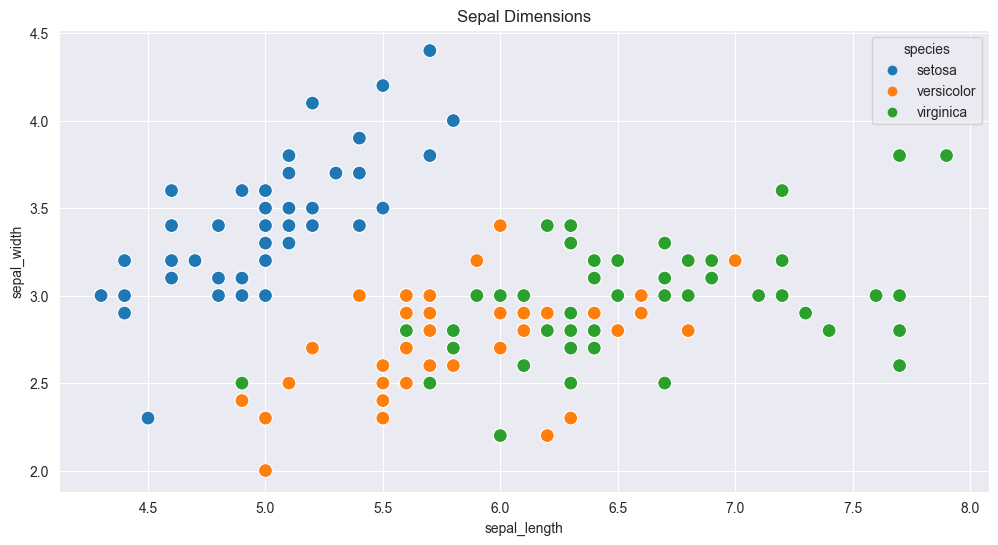

In [410]:
# Customizing Seaborn figures
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')
sns.scatterplot(x=flowers_df.sepal_length, 
 y=flowers_df.sepal_width, 
 hue=flowers_df.species,
 s=100);

# Histogram

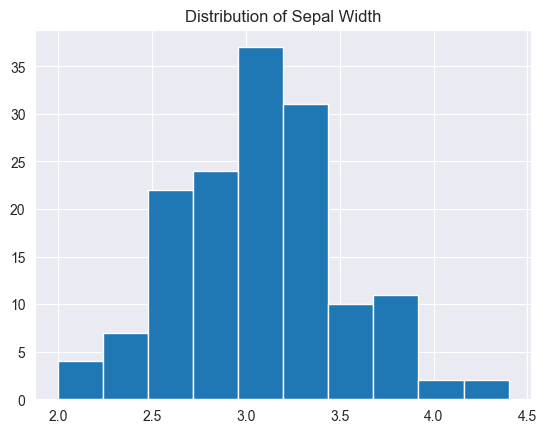

In [415]:
# Load data into a Pandas dataframe
flowers_df = sns.load_dataset("iris")
plt.title("Distribution of Sepal Width")
plt.hist(flowers_df.sepal_width);

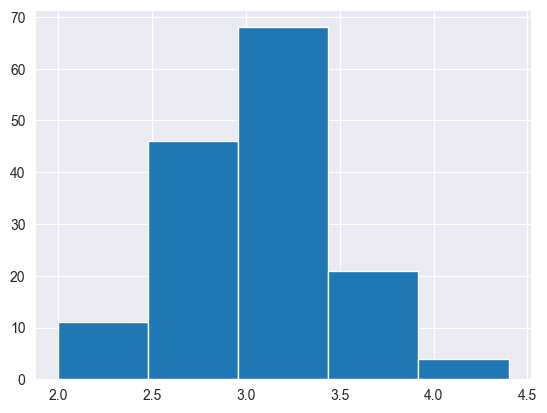

In [417]:
# Specifying the number of bins
plt.hist(flowers_df.sepal_width, bins=5);

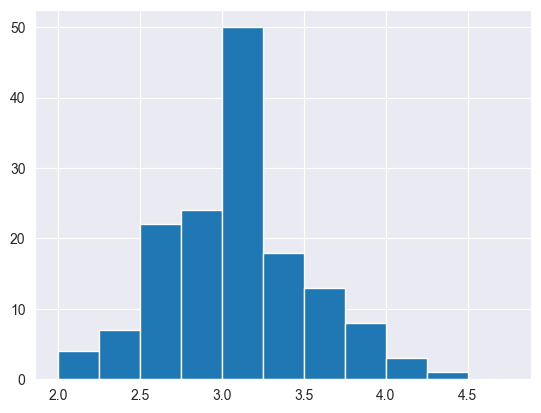

In [419]:
# Specifying the boundaries of each bin
plt.hist(flowers_df.sepal_width, bins=np.arange(2, 5, 0.25));

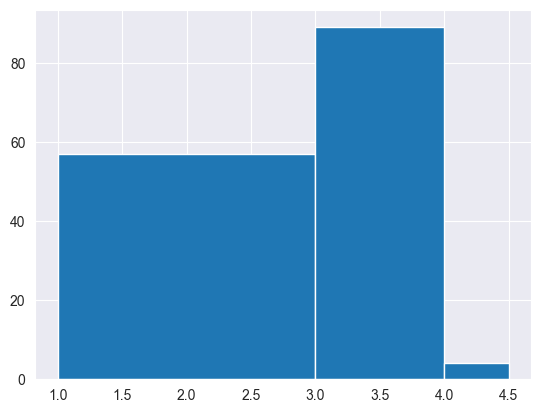

In [423]:
# Bins of unequal sizes
plt.hist(flowers_df.sepal_width, bins=[1, 3, 4, 4.5]);

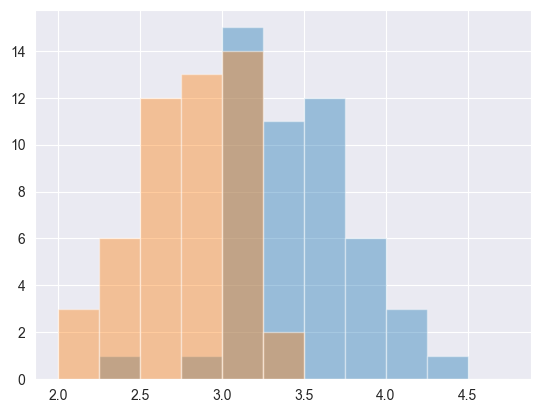

In [425]:
# Multiple Histograms
setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']
plt.hist(setosa_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));
plt.hist(versicolor_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));

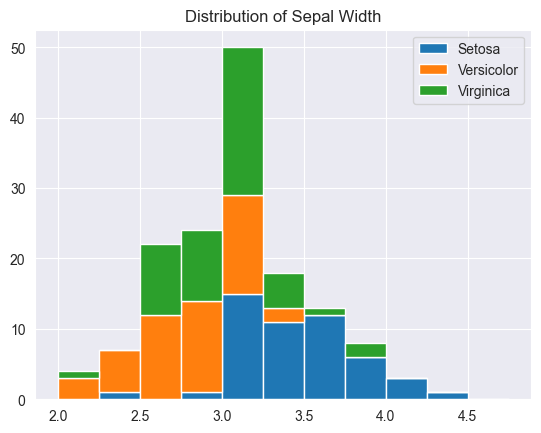

In [427]:
# stacked histogram
plt.title('Distribution of Sepal Width')
plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
 bins=np.arange(2, 5, 0.25), 
 stacked=True);
plt.legend(['Setosa', 'Versicolor', 'Virginica']);

# Barchart

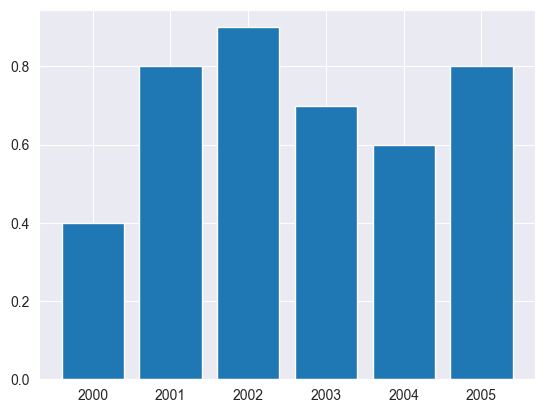

In [430]:
years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]
plt.bar(years, oranges);

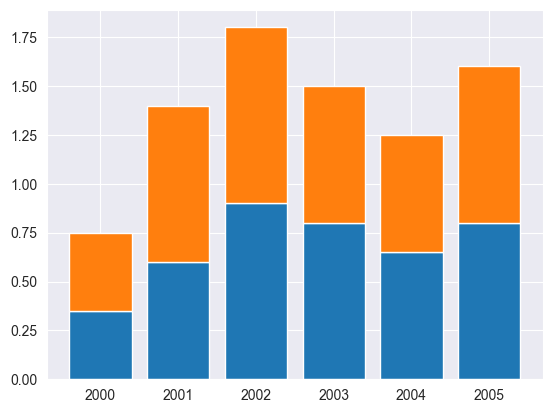

In [432]:
plt.bar(years, apples)
plt.bar(years, oranges, bottom=apples);

# Bar Plots with Averages


In [435]:
tips_df = sns.load_dataset("tips");

D:\gami\anac\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


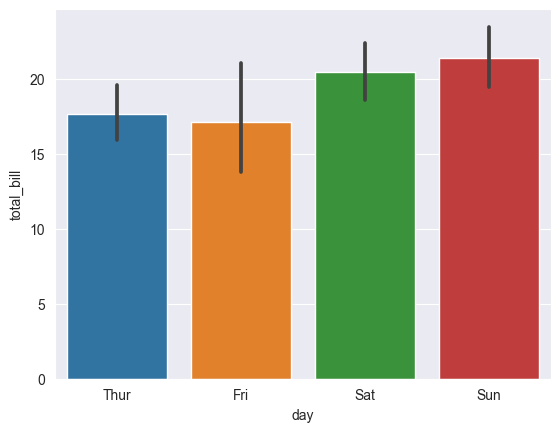

In [437]:
sns.barplot(x='day', y='total_bill', data=tips_df);

D:\gami\anac\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


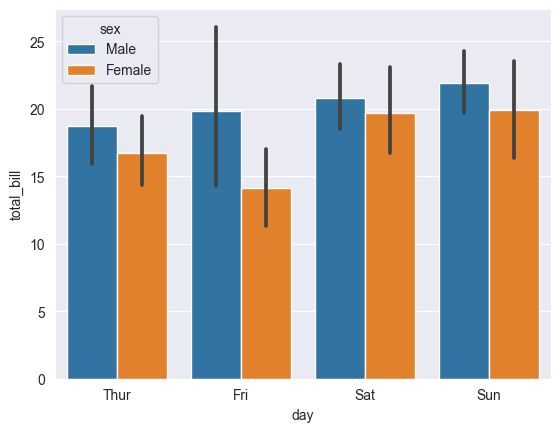

In [439]:
sns.barplot(x='day', y='total_bill', hue='sex', data=tips_df);

D:\gami\anac\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


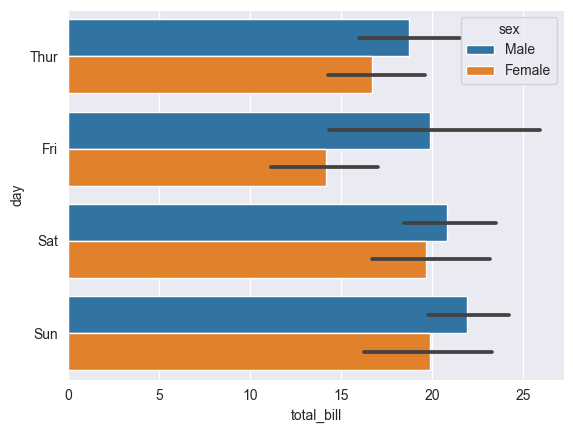

In [441]:
sns.barplot(x='total_bill', y='day', hue='sex', data=tips_df);

# heatmap

In [450]:
flights_df = sns.load_dataset("flights").pivot(index = "month", columns = "year",values ="passengers")
flights_df # please learn pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


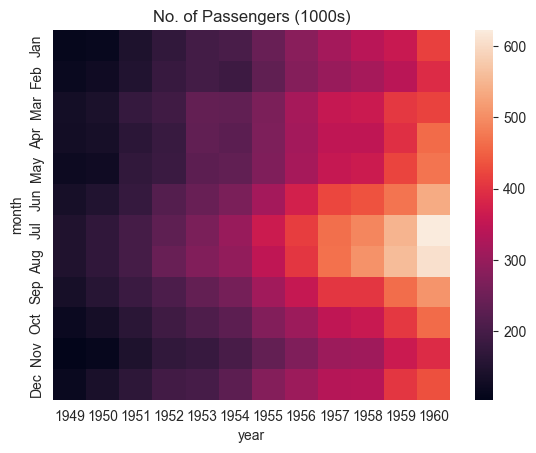

In [452]:
plt.title("No. of Passengers (1000s)")
sns.heatmap(flights_df);

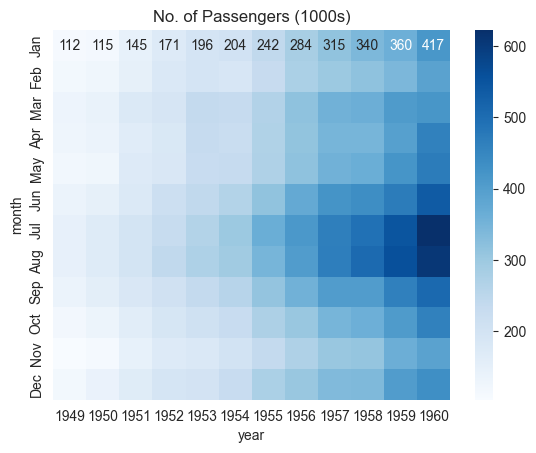

In [454]:
plt.title("No. of Passengers (1000s)")
sns.heatmap(flights_df, fmt="d", annot=True, cmap='Blues');
